# Keras functional API #

Sequential() has restrictions.

It does not allow you to create a model that has a shared layer or a network with multiple inputs or outputs.


The functional API in Keras is another way of creating a network model that offers more flexibility, including creating more complex models.

![image](https://imgur.com/yauAovN.jpg)

In [23]:
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

Platform: Windows-10-10.0.16299-SP0
Tensorflow version: 1.4.0
Keras version: 2.0.8


# Sequential Models #

The Sequential model API is very useful and convenient for most situations, but it has some limitations. 

For example, a network topology may have multiple different inputs, producing complex models that multiple outputs or reuse shared layers.

In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_shape=(1,)))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


# functional API #

It allows you to define multiple input or output models and models that share layers. 

In addition, it allows you to define ad-hoc acyclic network diagrams(動態的非週期性網絡圖).

## 1. Define input

Unlike the Sequential model, you must create instances of separate Input layer objects and define the tensor shape of the input data's tensor.

The input layer uses a tensor shape, which is a tuple that is used to declare the dimensions of the input tensor.


In [25]:
from keras.layers import Input

mnist_input = Input(shape=(784,))

## 2.Connect different network layers ##



In [26]:
from keras.layers import Input
from keras.layers import Dense

mnist_input = Input(shape=(784,))
hidden = Dense(512)(mnist_input)

## 3.Create a model ##

It will ask you to specify only the first input layer and the last output layer of the entire model.

In [27]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

mnist_input = Input(shape=(784,))
hidden = Dense(512)(mnist_input)

model = Model(inputs=mnist_input, outputs=hidden)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


# Multilayer Perceptron #

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               401920    
_________________________________________________________________
hidden2 (Dense)              (None, 216)               110808    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               27776     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 541,794
Trainable params: 541,794
Non-trainable params: 0
_________________________________________________________________


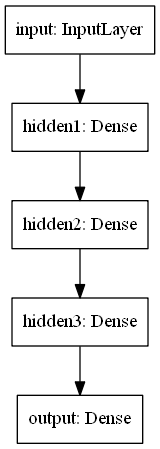

In [28]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils.vis_utils import plot_model

mnist_input = Input(shape=(784,), name='input')
hidden1 = Dense(512, activation='relu', name='hidden1')(mnist_input)
hidden2 = Dense(216, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
output = Dense(10, activation='softmax', name='output')(hidden3)

model = Model(inputs=mnist_input, outputs=output)

model.summary()

plot_model(model, to_file='./NN_image/multilayer_perceptron_graph.png')

Image('./NN_image/multilayer_perceptron_graph.png')

# CNN #

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 128)       2176      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 9, 9, 64)          131136    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
hidden1 (Dense)              (None, 4, 4, 64)          4160      
_________________________________________________________________
output (Dense)               (None, 4, 4, 10)          650       
Total para

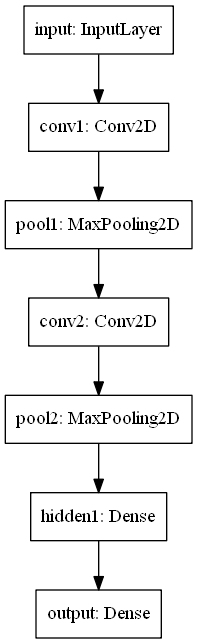

In [29]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.utils import plot_model

mnist_input = Input(shape=(28, 28, 1), name='input')

conv1 = Conv2D(128, kernel_size=(4,4), activation='relu', name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)

conv2 = Conv2D(64, kernel_size=4, activation='relu', name='conv2')(pool1)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)

hidden1 = Dense(64, activation='relu', name='hidden1')(pool2)
output = Dense(10, activation='softmax', name='output')(hidden1)
model = Model(inputs=mnist_input, outputs=output)

model.summary()

plot_model(model, to_file='./NN_image/convolutional_neural_network.png')

Image('./NN_image/convolutional_neural_network.png')

# RNN #

LSTM

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784, 1)            0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 128)               66560     
_________________________________________________________________
hidden1 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 84,362
Trainable params: 84,362
Non-trainable params: 0
_________________________________________________________________


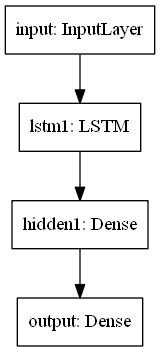

In [30]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.utils import plot_model

mnist_input = Input(shape=(784, 1), name='input') # Think of each pixel as a sequence of time_steps
lstm1 = LSTM(128, name='lstm1')(mnist_input)
hidden1 = Dense(128, activation='relu', name='hidden1')(lstm1)
output = Dense(10, activation='softmax', name='output')(hidden1)
model = Model(inputs=mnist_input, outputs=output)

model.summary()

plot_model(model, to_file='./NN_image/recurrent_neural_network.png')

Image('./NN_image/recurrent_neural_network.png')

# Shared layer model #

Multiple neural layers can share the output of a neural layer as an input.

For example, one input may have multiple different feature extraction layers or multiple neural layers to interpret the output of the feature extraction layer.

## 1.Shared Input Layer ##

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input (InputLayer)               (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 25, 25, 32)    544         input[0][0]                      
____________________________________________________________________________________________________
conv2 (Conv2D)                   (None, 21, 21, 16)    1040        input[0][0]                      
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 12, 12, 32)    0           conv1[0][0]                      
___________________________________________________________________________________________

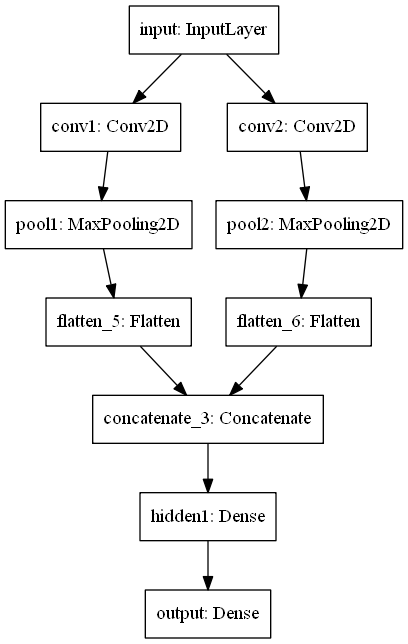

In [31]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

# Input layer
mnist_input = Input(shape=(28, 28, 1), name='input')

# The first feature extraction layer
conv1 = Conv2D(32, kernel_size=4, activation='relu', name='conv1')(mnist_input) 
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)
flat1 = Flatten()(pool1)

# The second feature extraction layer
conv2 = Conv2D(16, kernel_size=8, activation='relu', name='conv2')(mnist_input)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)
flat2 = Flatten()(pool2)

# Combine the results of the two feature extraction layers
merge = concatenate([flat1, flat2])

# Conducted full-linked layer
hidden1 = Dense(64, activation='relu', name='hidden1')(merge)
output = Dense(10, activation='softmax', name='output')(hidden1)
model = Model(inputs=mnist_input, outputs=output)

model.summary()
plot_model(model, to_file='./NN_image/shared_input_layer.png')
Image('./NN_image/shared_input_layer.png')

## 2.Shared Feature Extraction Layer ##

The model's input is 784 time steps for 1 feature. 

The LSTM layer with 10 memory cells interprets this sequence. 

The first explanation model is a shallow single-connected layer, the second is a deep three-layer model. The outputs of the two interpretation models are concatenated into a long vector and passed on to the output layer for the 10-category classification prediction.

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input (InputLayer)               (None, 784, 1)        0                                            
____________________________________________________________________________________________________
lstm1 (LSTM)                     (None, 128)           66560       input[0][0]                      
____________________________________________________________________________________________________
interp21 (Dense)                 (None, 64)            8256        lstm1[0][0]                      
____________________________________________________________________________________________________
interp22 (Dense)                 (None, 32)            2080        interp21[0][0]                   
___________________________________________________________________________________________

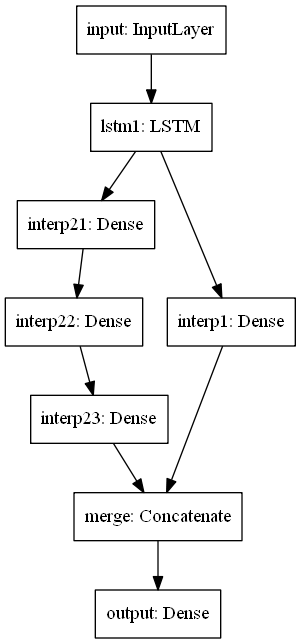

In [32]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate
from keras.utils import plot_model

# Input layer
mnist_input = Input(shape=(784, 1), name='input') # Think of each pixel as a sequence of time_steps

# Feature extraction layer
extract1 = LSTM(128, name='lstm1')(mnist_input)

# The first layer of explanation
interp1 = Dense(10, activation='relu', name='interp1')(extract1) 

# The second layer of explanation
interp21 = Dense(64, activation='relu', name='interp21')(extract1)
interp22 = Dense(32, activation='relu', name='interp22')(interp21)
interp23 = Dense(16, activation='relu', name='interp23')(interp22)

# Combine the results of the two feature extraction layers
merge = concatenate([interp1, interp23], name='merge')
output = Dense(10, activation='softmax', name='output')(merge)
model = Model(inputs=mnist_input, outputs=output)

model.summary()
plot_model(model, to_file='./NN_image/shared_feature_extractor.png')
Image('./NN_image/shared_feature_extractor.png')

# Multiple input and output models #

More complicated model

## 1.Multi-input model ##

We will develop an image classification model that takes as input two versions of the image, each with a different size.

Especially a 64 × 64 version of a grayscale and a 32 × 32 color version. 

Detached Feature Extraction The CNN model operates on each model and then concludes the two model results for interpretation and final prediction.

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
img_gray_bigsize (InputLayer)    (None, 64, 64, 1)     0                                            
____________________________________________________________________________________________________
img_rgb_smallsize (InputLayer)   (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
conv11 (Conv2D)                  (None, 61, 61, 32)    544         img_gray_bigsize[0][0]           
____________________________________________________________________________________________________
conv21 (Conv2D)                  (None, 29, 29, 32)    1568        img_rgb_smallsize[0][0]          
___________________________________________________________________________________________

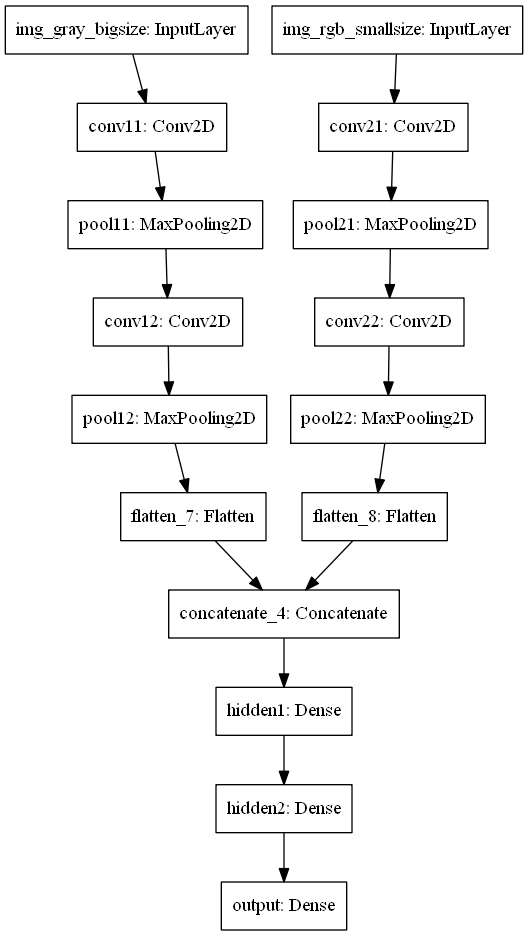

In [33]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

# The first input layer
img_gray_bigsize = Input(shape=(64, 64, 1), name='img_gray_bigsize')
conv11 = Conv2D(32, kernel_size=4, activation='relu', name='conv11')(img_gray_bigsize)
pool11 = MaxPool2D(pool_size=(2, 2), name='pool11')(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu', name='conv12')(pool11)
pool12 = MaxPool2D(pool_size=(2, 2), name='pool12')(conv12)
flat1 = Flatten()(pool12)

# The second input layer
img_rgb_smallsize = Input(shape=(32, 32, 3), name='img_rgb_smallsize')
conv21 = Conv2D(32, kernel_size=4, activation='relu', name='conv21')(img_rgb_smallsize)
pool21 = MaxPool2D(pool_size=(2, 2), name='pool21')(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu', name='conv22')(pool21)
pool22 = MaxPool2D(pool_size=(2, 2), name='pool22')(conv22)
flat2 = Flatten()(pool22)

# Combine the results of the two feature extraction layers
merge = concatenate([flat1, flat2])

# Explain the features with a hidden, fully connected layer
hidden1 = Dense(128, activation='relu', name='hidden1')(merge)
hidden2 = Dense(64, activation='relu', name='hidden2')(hidden1)

output = Dense(10, activation='softmax', name='output')(hidden2)
model = Model(inputs=[img_gray_bigsize, img_rgb_smallsize], outputs=output)

model.summary()
plot_model(model, to_file='./NN_image/multiple_inputs.png')
Image('./NN_image/multiple_inputs.png')

## 2.Multiple output model ##

I will develop a model for two different types of forecasting.

The LSTM layer interprets the input sequence and returns the hidden state of each time step. 

The first output model creates a stacked LSTM, interprets these features, and performs a multi-category forecast. 

The second output model uses the same output layer for multiple category predictions for each input time step.

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input (InputLayer)               (None, 784, 1)        0                                            
____________________________________________________________________________________________________
extract (LSTM)                   (None, 784, 64)       16896       input[0][0]                      
____________________________________________________________________________________________________
class11 (LSTM)                   (None, 32)            12416       extract[0][0]                    
____________________________________________________________________________________________________
class12 (Dense)                  (None, 32)            1056        class11[0][0]                    
___________________________________________________________________________________________

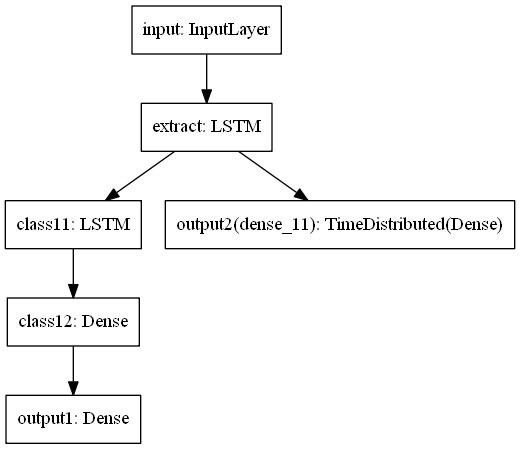

In [34]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.utils import plot_model

mnist_input = Input(shape=(784, 1), name='input') # Think of each pixel as a sequence of time_steps

# Feature extraction layer
extract = LSTM(64, return_sequences=True, name='extract')(mnist_input)

# Category output
class11 = LSTM(32, name='class11')(extract)
class12 = Dense(32, activation='relu', name='class12')(class11)
output1 = Dense(10, activation='softmax', name='output1')(class12)

# Sequence output
output2 = TimeDistributed(Dense(10, activation='softmax'), name='output2')(extract)
model = Model(inputs=mnist_input, outputs=[output1, output2])

model.summary()
plot_model(model, to_file='./NN_image/multiple_outputs.png')
Image('./NN_image/multiple_outputs.png')

# Best Practices #

* **Consistent Variable Names.** Use the same variable name for the input (visible) and output layers (output) and perhaps even the hidden layers (hidden1, hidden2). It will help to connect things together correctly.
<br>
<br>

* **Review Layer Summary**. Always print the model summary and review the layer outputs to ensure that the model was connected together as you expected.
<br>
<br>


* **Review Graph Plots.** Always create a plot of the model graph and review it to ensure that everything was put together as you intended.
<br><br>


* **Name the layers.** You can assign names to layers that are used when reviewing summaries and plots of the model graph. For example: Dense(1, name=’hidden1′).
<br><br>
 

* **Separate Submodels.** Consider separating out the development of submodels and combine the submodels together at the end.

<br><br><br>
## Reference ##
<br>
[How to Use the Keras Functional API for Deep Learning](https://machinelearningmastery.com/keras-functional-api-deep-learning/)